# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#from scipy.stats import stats
import scipy.stats as stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 
        response  = requests.get(city_url)

        # Parse the JSON and retrieve data
        city_weather  = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

         # Append the City information into city_data list
        city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

#  If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | kununurra
Processing Record 3 of Set 1 | petropavlovsk-kamchatsky
Processing Record 4 of Set 1 | kachug
Processing Record 5 of Set 1 | kasongo-lunda
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | nar'yan-mar
Processing Record 8 of Set 1 | badger
Processing Record 9 of Set 1 | saipan
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | broome
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | mata-utu
Processing Record 16 of Set 1 | rakhiv
Processing Record 17 of Set 1 | penzance
Processing Record 18 of Set 1 | benguela
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | wailua homesteads
Processing Record 21 of Set 1 | mahajanga
Processing Record 22 of Set 1 | al 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,7.12,94,60,0.89,NZ,1724263901
1,kununurra,-15.7667,128.7333,18.99,88,6,0.00,AU,1724263901
2,petropavlovsk-kamchatsky,53.0452,158.6483,8.33,76,0,1.00,RU,1724263901
3,kachug,53.9606,105.8817,12.27,78,2,1.13,RU,1724263901
4,kasongo-lunda,-6.4667,16.8167,28.09,19,42,1.31,CD,1724263901
...,...,...,...,...,...,...,...,...,...
556,general acha,-37.3770,-64.6043,5.09,85,100,6.41,AR,1724263934
557,amahai,-3.3333,128.9167,24.58,87,80,1.15,ID,1724263963
558,fale old settlement,-9.3852,-171.2468,27.65,77,97,8.88,TK,1724263964
559,junin,-34.5838,-60.9433,7.72,94,100,5.25,AR,1724263781


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,7.12,94,60,0.89,NZ,1724263901
1,kununurra,-15.7667,128.7333,18.99,88,6,0.00,AU,1724263901
2,petropavlovsk-kamchatsky,53.0452,158.6483,8.33,76,0,1.00,RU,1724263901
3,kachug,53.9606,105.8817,12.27,78,2,1.13,RU,1724263901
4,kasongo-lunda,-6.4667,16.8167,28.09,19,42,1.31,CD,1724263901


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,7.12,94,60,0.89,NZ,1724263901
1,kununurra,-15.7667,128.7333,18.99,88,6,0.00,AU,1724263901
2,petropavlovsk-kamchatsky,53.0452,158.6483,8.33,76,0,1.00,RU,1724263901
3,kachug,53.9606,105.8817,12.27,78,2,1.13,RU,1724263901
4,kasongo-lunda,-6.4667,16.8167,28.09,19,42,1.31,CD,1724263901


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

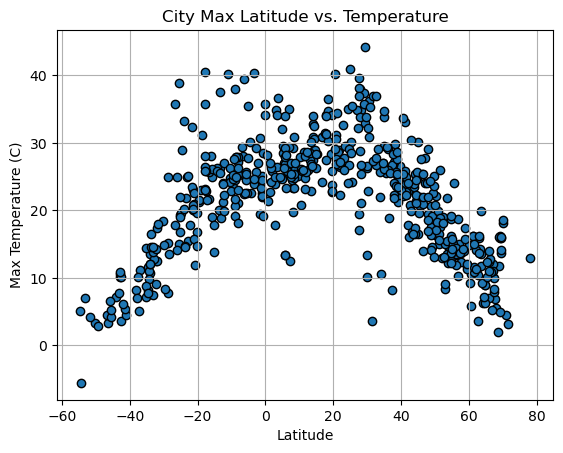

In [8]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig01.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

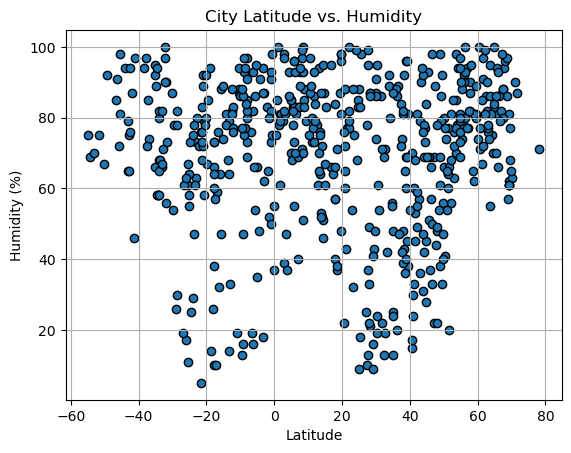

In [9]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig02.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

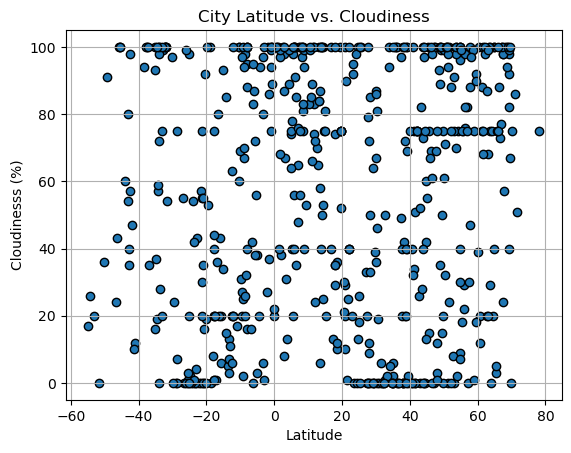

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudinesss (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig03.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

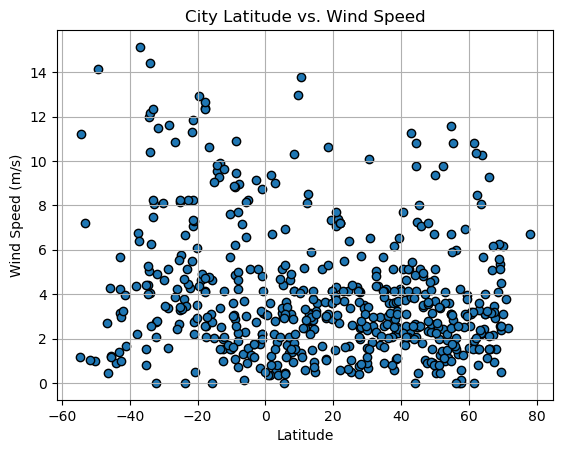

In [11]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig04.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def Plot_Linear_Regression(x_values, y_values):
   (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
   regress_values = x_values * slope + intercept
   line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   plt.plot(x_values, regress_values, color = "red")
   
   return[line_eq, rvalue]

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,petropavlovsk-kamchatsky,53.0452,158.6483,8.33,76,0,1.00,RU,1724263901
3,kachug,53.9606,105.8817,12.27,78,2,1.13,RU,1724263901
5,albany,42.6001,-73.9662,20.81,57,26,2.24,US,1724263693
6,nar'yan-mar,67.6713,53.0870,6.86,94,57,2.91,RU,1724263901
7,badger,64.8000,-147.5333,8.93,83,100,3.09,US,1724263901


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,7.12,94,60,0.89,NZ,1724263901
1,kununurra,-15.7667,128.7333,18.99,88,6,0.00,AU,1724263901
4,kasongo-lunda,-6.4667,16.8167,28.09,19,42,1.31,CD,1724263901
9,edinburgh of the seven seas,-37.0676,-12.3116,11.20,74,35,15.14,SH,1724263901
11,grytviken,-54.2811,-36.5092,-5.57,69,26,11.22,GS,1724263902


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6965856959509029


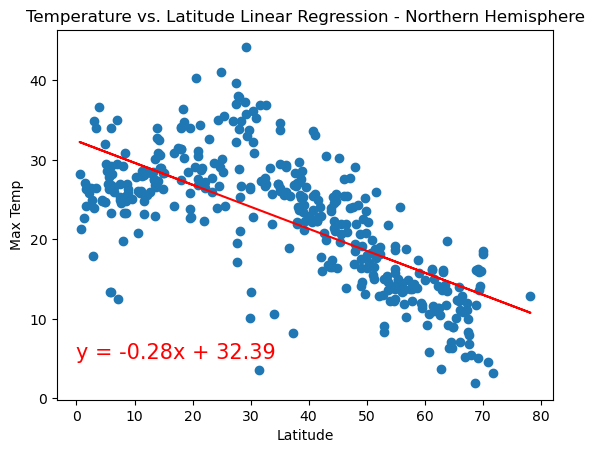

In [15]:
# Linear regression on Northern Hemisphere

# Call Function Plot_Linear_Regression
label = Plot_Linear_Regression (northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.annotate(label[0],(0,5),fontsize=15,color="red")
plt.title("Temperature vs. Latitude Linear Regression - Northern Hemisphere")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(False)

#print r-value
print(f"The r-value is: {label[1]}")

# Save the figure
plt.savefig("output_data/Fig05.png")

# Show plot
plt.show()

The r-value is: 0.7887232965747396


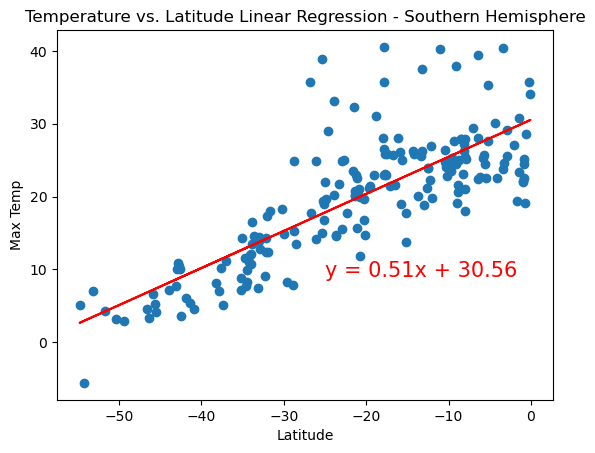

In [23]:
# Linear regression on Southern Hemisphere

# Call Function Plot_Linear_Regression
label = Plot_Linear_Regression (southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.annotate(label[0],(-25,9),fontsize=15,color="red")
plt.title("Temperature vs. Latitude Linear Regression - Southern Hemisphere")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(False)

#print r-value
print(f"The r-value is: {label[1]}")

# Save the figure
plt.savefig("output_data/Fig06.png")

# Show plot
plt.show()

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.03563703428755064


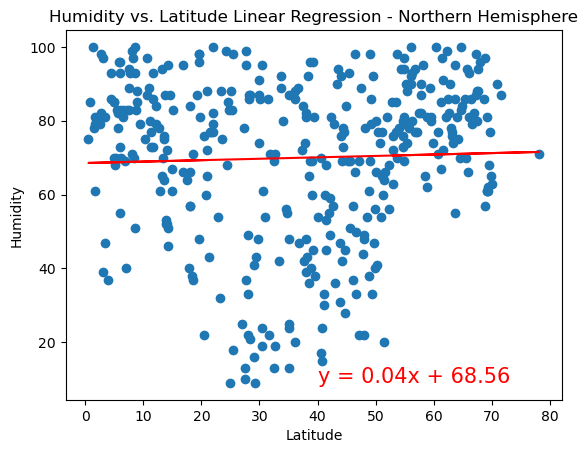

In [24]:
# Northern Hemisphere

# Call Function Plot_Linear_Regression
label = Plot_Linear_Regression (northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.annotate(label[0],(40,9),fontsize=15,color="red")
plt.title("Humidity vs. Latitude Linear Regression - Northern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(False)

#print r-value
print(f"The r-value is: {label[1]}")

# Save the figure
plt.savefig("output_data/Fig07.png")

# Show plot
plt.show()

The r-value is: -0.09651706659756396


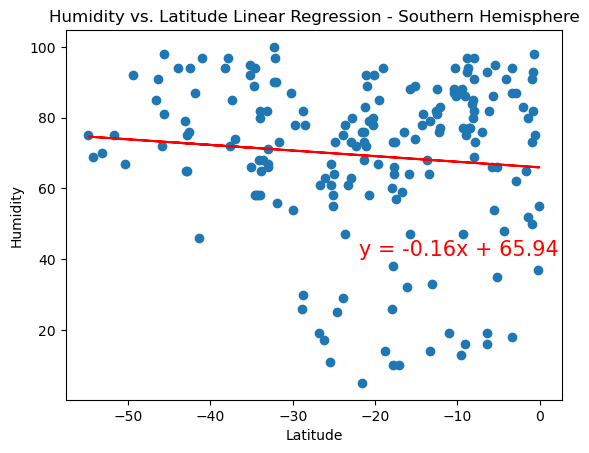

In [25]:
# Southern Hemisphere

# Call Function Plot_Linear_Regression
label = Plot_Linear_Regression (southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.annotate(label[0],(-22,41),fontsize=15,color="red")
plt.title("Humidity vs. Latitude Linear Regression - Southern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(False)

#print r-value
print(f"The r-value is: {label[1]}")

# Save the figure
plt.savefig("output_data/Fig08.png")

# Show plot
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.010514090356812236


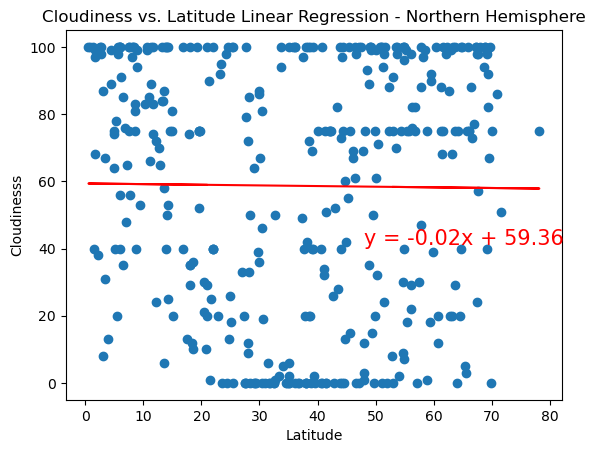

In [26]:
# Northern Hemisphere

# Call Function Plot_Linear_Regression
label = Plot_Linear_Regression (northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.annotate(label[0],(48,41),fontsize=15,color="red")
plt.title("Cloudiness vs. Latitude Linear Regression - Northern Hemisphere")
plt.ylabel("Cloudinesss")
plt.xlabel("Latitude")
plt.grid(False)

#print r-value
print(f"The r-value is: {label[1]}")

# Save the figure
plt.savefig("output_data/Fig09.png")

# Show plot
plt.show()

The r-value is: 0.014405603526608359


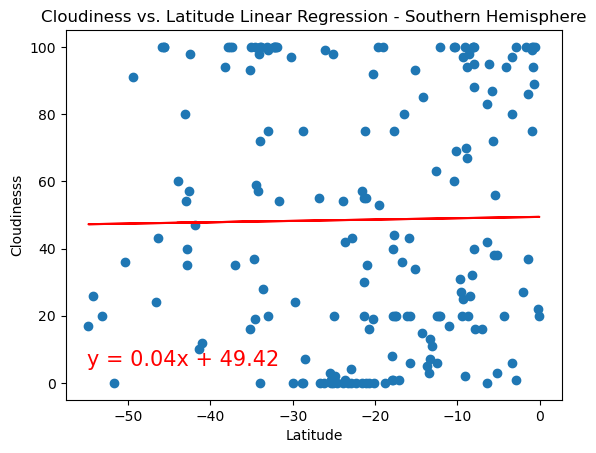

In [27]:
# Southern Hemisphere

# Call Function Plot_Linear_Regression
label = Plot_Linear_Regression (southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.annotate(label[0],(-55,5),fontsize=15,color="red")
plt.title("Cloudiness vs. Latitude Linear Regression - Southern Hemisphere")
plt.ylabel("Cloudinesss")
plt.xlabel("Latitude")
plt.grid(False)

#print r-value
print(f"The r-value is: {label[1]}")

# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.024966714882008554


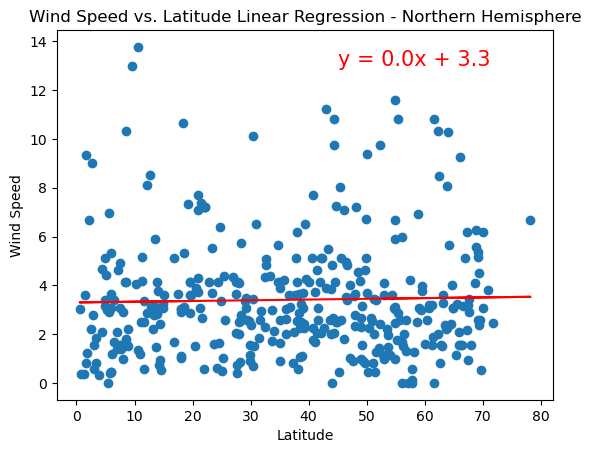

In [28]:
# Northern Hemisphere

# Call Function Plot_Linear_Regression
label = Plot_Linear_Regression (northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.annotate(label[0],(45,13),fontsize=15,color="red")
plt.title("Wind Speed vs. Latitude Linear Regression - Northern Hemisphere")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(False)

#print r-value
print(f"The r-value is: {label[1]}")

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()

The r-value is: -0.09075219132878823


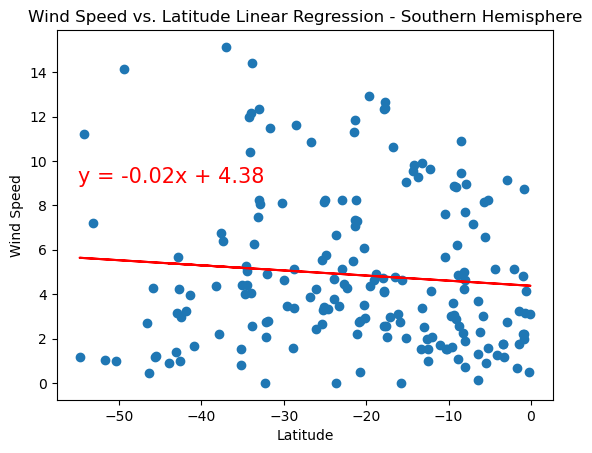

In [29]:
# Southern Hemisphere

# Call Function Plot_Linear_Regression
label = Plot_Linear_Regression (southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.annotate(label[0],(-55,9),fontsize=15,color="red")
plt.title("Wind Speed vs. Latitude Linear Regression - Southern Hemisphere")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(False)

#print r-value
print(f"The r-value is: {label[1]}")

# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()